DATA EXPLORATION

In [2]:
#IMPORTING CLASSES TO BE USED FOR DATA EXPLORATION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Creating data frame
# Try decoding the file with different codecs
possible_codecs = ['utf-8', 'latin-1', 'cp1252']
for codec in possible_codecs:
    try:
        df = pd.read_csv("D:/sms classifier new/sms_spam (1).csv", encoding=codec)
        print(f"File decoded successfully with {codec} encoding.")
        break
    except UnicodeDecodeError:
        print(f"Failed to decode with {codec} encoding.")

# If none of the codecs work, raise an error
else:
    raise ValueError("Unable to decode the file with any of the specified encodings.")

# Now df contains your DataFrame with the data from the CSV file, encoding='utf-8', latin = "")

File decoded successfully with utf-8 encoding.


In [4]:
df.head(12)

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...
5,ham,Aiya we discuss later lar... Pick u up at 4 is...
6,ham,Are you this much buzy
7,ham,Please ask mummy to call father
8,spam,Marvel Mobile Play the official Ultimate Spide...
9,ham,"fyi I'm at usf now, swing by the room whenever"


In [5]:
df.describe()

,type,text
count,5559,5559
unique,2,5156
top,ham,"Sorry, I'll call later"
freq,4812,30


In [6]:
##DATA INSPECTION
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5559 non-null   object
 1   text    5559 non-null   object
dtypes: object(2)
memory usage: 87.0+ KB


In [7]:
##CHECKING FOR EMPTY DATA SET/NULL ENTRY
df.isnull().sum()

type    0
text    0
dtype: int64

In [8]:
# Check for duplicate rows
df.duplicated().sum()

403

In [9]:
display(df)

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...
...,...,...
5554,ham,You are a great role model. You are giving so ...
5555,ham,"Awesome, I remember the last time we got someb..."
5556,spam,"If you don't, your prize will go to another cu..."
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn..."


DATA VISUALISATION

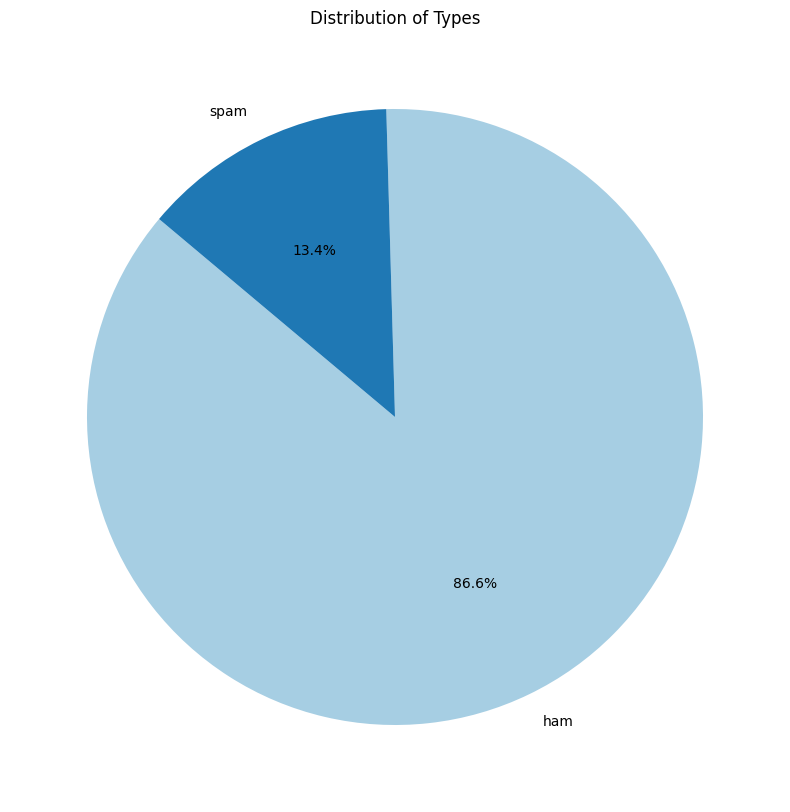

In [10]:
# Group by 'type' and count the occurrences
type_counts = df['type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 10))
type_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Types')
plt.ylabel('')  # Hide the y-label
plt.show()

DATA PREPROCESSING

In [11]:
data = df

In [12]:
# Remove the " min" substring from each value in the "Duration" column
df["type"] = df["type"].str.replace("spam", "0")
df["type"] = df["type"].str.replace("ham", "1")

# Convert the "Duration" column to integers
df["type"] = df["type"].astype(int)

In [13]:
display(df)

,type,text
0,1,Hope you are having a good week. Just checking in
1,1,K..give back my thanks.
2,1,Am also doing in cbe only. But have to pay.
3,0,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,0,okmail: Dear Dave this is your final notice to...
...,...,...
5554,1,You are a great role model. You are giving so ...
5555,1,"Awesome, I remember the last time we got someb..."
5556,0,"If you don't, your prize will go to another cu..."
5557,0,"SMS. ac JSco: Energy is high, but u may not kn..."


MACHINE LEARNING MODEL MAKING

Logistic Regression Modeling

Logistic Regression is a statistical modeling technique used to predict binary outcomes or probabilities. It is commonly used when the dependent variable (target variable) is categorical and has two possible outcomes, such as yes/no, success/failure, or 0/1.

To perform logistic regression with 10-fold cross-validation using scikit-learn, you can use the following code:

In [14]:
# Import
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
# Define features and target
X = df['text']  # Features
y = df['type']  # Target variable

# Convert text data to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Display the results
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target:\n", y_train)
print("Testing target:\n", y_test)

Training features shape: (4447, 8666)
Testing features shape: (1112, 8666)
Training target:
 1392    1
2633    1
2574    1
1255    1
4228    1
       ..
3772    1
5191    1
5226    1
5390    1
860     1
Name: type, Length: 4447, dtype: int32
Testing target:
 4963    1
4943    1
4345    1
230     1
1044    1
       ..
4684    1
5382    0
2420    1
3631    1
70      1
Name: type, Length: 1112, dtype: int32


In [16]:
# Standardize the features (though not necessary for CountVectorizer output)
scaler = preprocessing.StandardScaler(with_mean=False).fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up logistic regression model
model = LogisticRegression(max_iter=1000)

# Set up cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=32)

# Perform cross-validation and calculate accuracy
scores = cross_val_score(model, X_train_scaled, y_train, scoring='accuracy', cv=cv)

# Print the cross-validation scores
print("Cross-validation accuracy scores:", scores)
print("Mean cross-validation accuracy:", scores.mean())

Cross-validation accuracy scores: [0.97752809 0.96404494 0.95730337 0.97078652 0.97752809 0.96404494
 0.95730337 0.96171171 0.97072072 0.97747748]
Mean cross-validation accuracy: 0.9678449235752605


In [17]:
# Print the mean ROC AUC score across folds
print('Mean ROC AUC:', scores.mean())

Mean ROC AUC: 0.9678449235752605


In [18]:
# Fit the model on the training set
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [19]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

In [20]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [21]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)

Test set accuracy: 0.9730215827338129


In [22]:
# Predict probabilities on the test set
predictions = model.predict_proba(X_test_scaled)
print(predictions[:, 1])

# Convert the predictions to a list
variable = predictions[:, 1].tolist()
print(variable)

[0.99995704 0.99992202 0.99993464 ... 0.99996811 0.99993955 0.99993703]
[0.9999570388012223, 0.9999220222822827, 0.9999346414545659, 0.9998420459235298, 0.9999295048258069, 0.9999783293703428, 0.999947394736193, 0.9999112427633207, 0.9999445573363951, 0.998998437140438, 0.9999565295428965, 0.9999838626164786, 0.9998717944970853, 0.9999838076222998, 0.9999479126301773, 0.9998828110240849, 0.058182852070438364, 0.999886152706198, 0.9997257360150339, 0.9997852633303252, 0.02098630991232628, 0.9999616760329971, 0.999953309136735, 0.9994560933868618, 0.9976363995970137, 0.9995265037413549, 0.9999711213570118, 0.9998994177739707, 0.9997104885366851, 0.9999553302147755, 0.9998832388791299, 0.999912199013986, 0.999922360042773, 0.9999905592708522, 0.999505562618266, 0.9999358857091003, 0.9999768280022313, 0.9998344958639599, 0.999910315245137, 0.0008875937593904702, 0.9996423339375322, 0.9999514818524173, 0.9999502663707269, 0.9999638740069116, 0.9999545610866644, 0.9999388828741808, 0.9998666